In [220]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing, cluster, metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from datetime import date

In [221]:
customers = pd.read_csv('data/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
translation = pd.read_csv('data/product_category_name_translation.csv')

In [222]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [223]:
geolocalisation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [224]:
order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [225]:
order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [226]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [227]:
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [228]:
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [229]:
translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [230]:
liste_df = [customers, 
            geolocalisation,
            order_items,
            order_payments,
            order_reviews,
            orders,products,
            sellers,
            translation]

In [231]:
for df in liste_df:
    print(df.isnull().mean())

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64
review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64
order_id 

In [232]:
def rename(dataframes):
    
    output = dataframes.copy()
    
    noms_df = ['customers', 
           'geolocalisation',
           'order_items',
           'order_payments',
           'order_reviews',
           'orders',
           'products',
           'sellers',
           'translation']
    
    for i in range(len(noms_df)):
        output[i].name = noms_df[i]
    
    return output

In [233]:
liste_df = rename(liste_df)

In [234]:
for df in liste_df :
    print(df.name, df.shape)

customers (99441, 5)
geolocalisation (1000163, 5)
order_items (112650, 7)
order_payments (103886, 5)
order_reviews (99224, 7)
orders (99441, 8)
products (32951, 9)
sellers (3095, 4)
translation (71, 2)


In [235]:
for df in liste_df:
    print(df.name, df.isna().sum().sum()/df.shape[0]/df.shape[1])

customers 0.0
geolocalisation 0.0
order_items 0.0
order_payments 0.0
order_reviews 0.21006294560071873
orders 0.00616948743476031
products 0.008254681193287003
sellers 0.0
translation 0.0


In [236]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [237]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [238]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [239]:
for df in liste_df:
    print(df.name, df.duplicated().sum())

customers 0
geolocalisation 261831
order_items 0
order_payments 0
order_reviews 0
orders 0
products 0
sellers 0
translation 0


In [240]:
for df in liste_df:
    print()
    print(df.name)
    print(df[df.columns].nunique())


customers
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

geolocalisation
geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

order_items
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

order_payments
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

order_reviews
review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     3615

In [241]:
for df in liste_df:
    print()
    print(df.name)
    print()
    for column in df:
        print(column, df[column].dtype)


customers

customer_id object
customer_unique_id object
customer_zip_code_prefix int64
customer_city object
customer_state object

geolocalisation

geolocation_zip_code_prefix int64
geolocation_lat float64
geolocation_lng float64
geolocation_city object
geolocation_state object

order_items

order_id object
order_item_id int64
product_id object
seller_id object
shipping_limit_date object
price float64
freight_value float64

order_payments

order_id object
payment_sequential int64
payment_type object
payment_installments int64
payment_value float64

order_reviews

review_id object
order_id object
review_score int64
review_comment_title object
review_comment_message object
review_creation_date object
review_answer_timestamp object

orders

order_id object
customer_id object
order_status object
order_purchase_timestamp object
order_approved_at object
order_delivered_carrier_date object
order_delivered_customer_date object
order_estimated_delivery_date object

products

product_id object


In [242]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Analyse

customers 

customer_id a une valeure différente de customer_unique_id

geolocalisation

Beaucoup plus de ville enregistré que dans la tablea customer

order_items

Tout les seller_id de la table seller sont recensé
shipping_limit_date à convertir en format Date
    
order_payments 

order_id contient autant de valeurs que dans order

orders

order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, 
    order_delivered_customer_date, order_estimated_delivery_date à convertir en format Date 
products

sellers

2 catégories de produit ne sont pas traduit

Nettoyage

In [243]:
def clean(dataframes):
    
    customers_clean = dataframes[0].copy()
    geolocalisation_clean  = dataframes[1].copy()
    order_items_clean  = dataframes[2].copy()
    order_payments_clean  = dataframes[3].copy()
    order_reviews_clean  = dataframes[4].copy()
    orders_clean  = dataframes[5].copy()
    products_clean = dataframes[6].copy()
    sellers_clean = dataframes[7].copy()
    translation_clean = dataframes[8].copy()
    
    #Gestion des doublons
    geolocalisation.drop_duplicates(inplace=True)
    
    #Gestion des NaN en fonction de la colonne
    order_reviews_clean['review_comment_title'].fillna(' ', inplace=True)
    order_reviews_clean['review_comment_message'].fillna(' ', inplace=True)
    
    orders_clean['order_approved_at'].fillna(0, inplace=True)
    orders_clean['order_delivered_carrier_date'].fillna(0, inplace=True)
    orders_clean['order_delivered_customer_date'].fillna(0, inplace=True)
    
    products_clean['product_category_name'].fillna('Inconnue', inplace=True)
    products_clean['product_name_lenght'].fillna(0, inplace=True)
    products_clean['product_description_lenght'].fillna(0,inplace=True)
    products_clean['product_photos_qty'].fillna(0, inplace=True)
    products_clean['product_weight_g'].fillna(0, inplace=True)
    products_clean['product_length_cm'].fillna(0, inplace=True)
    products_clean['product_height_cm'].fillna(0, inplace=True)
    products_clean['product_width_cm'].fillna(0, inplace=True)
    
    #Gestion du type Date
    order_items_clean['shipping_limit_date'] = order_items_clean['shipping_limit_date'].astype('datetime64')
    orders_clean['order_purchase_timestamp'] = orders_clean['order_purchase_timestamp'].astype('datetime64')
    orders_clean['order_approved_at'] = pd.to_datetime(orders_clean['order_approved_at'], errors='coerce')
    orders_clean['order_delivered_carrier_date'] = pd.to_datetime(orders_clean['order_delivered_carrier_date'], errors='coerce')
    orders_clean['order_delivered_customer_date'] = pd.to_datetime(orders_clean['order_delivered_customer_date'], errors='coerce')
    orders_clean['order_estimated_delivery_date'] = orders_clean['order_estimated_delivery_date'].astype('datetime64')
    
    
    #Création de la liste de dataFrames qui vont être renvoyé
    output = [customers_clean, geolocalisation_clean, order_items_clean, 
             order_payments_clean, order_reviews_clean, orders_clean, 
            products_clean, sellers_clean, translation_clean]
    
    #On re associe le nom des dataFrames    
    output = rename(output)  
    
    return output

In [244]:
liste_df = clean(liste_df)

In [199]:
for df in liste_df:
    print(" ")
    print(df.name)
    print(" ")
    print(df.isnull().sum())

 
customers
 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
 
geolocalisation
 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
 
order_items
 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
 
order_payments
 
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
 
order_reviews
 
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int

In [26]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


affichage de la fréquence de chaque catégorie

In [27]:
cat_translation = pd.merge(products, translation)

print(cat_translation.groupby(['product_category_name_english']).count()[
    'product_category_name'].sort_values(ascending=False).head(50))

product_category_name_english
bed_bath_table                             3029
sports_leisure                             2867
furniture_decor                            2657
health_beauty                              2444
housewares                                 2335
auto                                       1900
computers_accessories                      1639
toys                                       1411
watches_gifts                              1329
telephony                                  1134
baby                                        919
perfumery                                   868
stationery                                  849
fashion_bags_accessories                    849
cool_stuff                                  789
garden_tools                                753
pet_shop                                    719
electronics                                 517
construction_tools_construction             400
home_appliances                             370
luggage_ac

On peut voir qu'il y a des catégories qui se répètent beaucoup plus que d'autre on pourrais les regrouper afin d'avoir moins de catégories a manipuler pour la suite.

In [28]:
def merge(dataframes):
    
    #on récupère les dataframes
    customers_local = dataframes[0].copy()
    geolocalisation_local  = dataframes[1].copy()
    order_items_local  = dataframes[2].copy()
    order_payments_local  = dataframes[3].copy()
    order_reviews_local  = dataframes[4].copy()
    orders_local  = dataframes[5].copy()
    products_local = dataframes[6].copy()
    sellers_local = dataframes[7].copy()
    translation_local = dataframes[8].copy()
    
    #depense total par client
    customers_orders = pd.merge(customers_local, orders_local)
    depense_tot_par_client = pd.merge(order_items_local, customers_orders).groupby(['customer_unique_id'])
    depense_tot_par_client = depense_tot_par_client['price'].sum()    
    depense_tot_par_client.rename('Depense_tot', inplace=True)
    
    #Nombre d'achats total par client
    order_merge = pd.merge(order_items_local, customers_orders)
    

   # achat_par_client = order_merge[['order_id','order_item_id','customer_unique_id', 'order_purchase_timestamp']]
    
    
    nb_order_par_client = order_merge.groupby('customer_unique_id')['order_id'].count() 
    nb_order_par_client.rename('Nb_achat', inplace=True)
    
    #dernier achat
    order_merge = pd.merge(order_items_local, customers_orders)
    date_achat = order_merge[['customer_unique_id', 'order_purchase_timestamp']].groupby('customer_unique_id').max()
    date_achat['date_dernier_achat'] = date_achat['order_purchase_timestamp']    
    
    #nombre de jours écoulés depuis dernier achat
    date_achat['nb_jour_dernier_achat'] = date_achat['order_purchase_timestamp'].max() -  date_achat[
        'order_purchase_timestamp']
    date_achat['nb_jour_dernier_achat'] = date_achat['nb_jour_dernier_achat'].apply(lambda x: x.days)
       
    
    #moyen de paiement par client
    type_paiement_par_client = pd.merge(customers_orders, order_payments_local).sort_values(['customer_unique_id'],ascending=False)
    type_paiement = type_paiement_par_client[['customer_unique_id', 'payment_type']]
    
    #ohe pour les moyen de paiements
    type_paiement.set_index('customer_unique_id', inplace=True)
    type_paiement = pd.get_dummies(type_paiement)


    type_paiement = type_paiement.groupby(['customer_unique_id']).sum()
    
    type_paiement_par_client = type_paiement_par_client.groupby(['customer_unique_id', 'payment_type'])
    type_paiement_par_client = type_paiement_par_client.head(1)[['customer_unique_id', 'payment_type','payment_installments']]
    type_paiement_par_client.columns = ['customer_unique_id', 'Moy_Paiment','Nb_Paiement']
    type_paiement_par_client.set_index('customer_unique_id', inplace=True)
    type_paiement_par_client.drop(['Moy_Paiment'], axis=1, inplace=True)
    
   
    #note moyenne des reviews de l'utilisateur
    note_moy = pd.merge(order_reviews_local, customers_orders)
    note_moy = note_moy.groupby('customer_unique_id')['review_score'].mean()
    note_moy.rename('Note_Moy_Review', inplace=True)
    
    #on va regrouper les catégories avec une fréquence faible
    cat_translation = pd.merge(products, translation)

    #17 premières catégories
    top_cat = cat_translation.groupby(['product_category_name_english']).count()[
    'product_category_name'].sort_values(ascending=False).head(17).index.tolist()
    
    
    index_cat = translation_local[~translation_local['product_category_name_english'].isin(
        top_cat)].index
    translation_local.loc[index_cat, 'product_category_name_english'] = 'Other' 
    
    #La catégorie préféré du client
    produits_par_client = pd.merge(customers_local, order_merge)
    cat_translation = pd.merge(products_local, translation_local)
    categorie_pref_par_client = pd.merge(produits_par_client, cat_translation)
    categorie_pref_par_client = categorie_pref_par_client.sort_values(['customer_unique_id','product_category_name_english'], ascending=False)
    categorie_pref_par_client = categorie_pref_par_client.groupby(['customer_unique_id','product_category_name_english'])
    categorie_pref_par_client = categorie_pref_par_client.head(1)[['customer_unique_id', 'product_category_name_english']]
    categorie_pref_par_client.columns = ['customer_unique_id', 'Cat_pref'] 
    
    #caract des colis
    colis_caract = pd.merge(produits_par_client, products_local)
    poids_moy = colis_caract.groupby('customer_unique_id')['product_weight_g'].mean()
    poids_moy.rename('Poids_moy_colis', inplace=True)
    longueur_moy = colis_caract.groupby('customer_unique_id')['product_length_cm'].mean()
    longueur_moy.rename('Longueur_moy_colis', inplace=True)
    hauteur_moy = colis_caract.groupby('customer_unique_id')['product_height_cm'].mean()
    hauteur_moy.rename('Hauteur_moy_colis', inplace=True)
    largeur_moy = colis_caract.groupby('customer_unique_id')['product_width_cm'].mean()
    largeur_moy.rename('Largeur_moy_colis', inplace=True)

    categorie_pref_par_client.set_index('customer_unique_id', inplace=True)
    
    
    customers_local.set_index('customer_unique_id', inplace=True)
    for df in [depense_tot_par_client,
               nb_order_par_client,
               date_achat,
               type_paiement,
               type_paiement_par_client,
               note_moy,
               categorie_pref_par_client,
               poids_moy,
               longueur_moy,
               hauteur_moy,
               largeur_moy
              ]:
        customers_local = pd.merge(left = customers_local,
                                   right = df,
                                   how = 'left',
                                   left_index = True, 
                                   right_index = True)
        

        
    customers_local.reset_index(inplace=True)    
    
    print(customers_local.groupby(['Nb_achat']).count()[
    'customer_unique_id'].sort_values(ascending=True))
    
    #on isole la vile pour l'utiliser plus tards
    
    customers_city = customers_local[['customer_id', 'customer_city']]
    
    customers_local.drop(['customer_state'], axis=1, inplace=True)
    customers_local.drop(['customer_city'], axis=1, inplace=True)    
    customers_local.drop(['customer_id'], axis=1, inplace=True)
   
    customers_local.drop(['date_dernier_achat'], axis=1, inplace=True)
    customers_local.drop(['customer_zip_code_prefix'], axis=1, inplace=True)
    
    data_copy = customers_local.copy()
    customers_local.drop(['order_purchase_timestamp'], axis=1, inplace=True)
    
    customers_local.set_index('customer_unique_id', inplace=True)
        
    
    return customers_local, customers_city, data_copy

In [29]:
output = merge(liste_df)
data = output[0]
customers_city = output[1]
data_copy = output[2]
display(data.head(5), data.tail(5))

Nb_achat
21.0        1
20.0        2
15.0        3
13.0        3
24.0        4
18.0        4
10.0       20
8.0        46
14.0       47
16.0       51
11.0       65
12.0       68
9.0       149
7.0       222
6.0       340
5.0       613
4.0      1412
3.0      3530
2.0     14837
1.0     85574
Name: customer_unique_id, dtype: int64


,Depense_tot,Nb_achat,nb_jour_dernier_achat,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,Nb_Paiement,Note_Moy_Review,Cat_pref,Poids_moy_colis,Longueur_moy_colis,Hauteur_moy_colis,Largeur_moy_colis
customer_unique_id,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1.0,115.0,0.0,1.0,0.0,0.0,0.0,8.0,5.0,bed_bath_table,1500.0,34.0,7.0,32.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1.0,118.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,health_beauty,375.0,26.0,11.0,18.0
0000f46a3911fa3c0805444483337064,69.00,1.0,541.0,0.0,1.0,0.0,0.0,0.0,8.0,3.0,stationery,1500.0,25.0,50.0,35.0
0000f6ccb0745a6a4b88665a16c9f078,25.99,1.0,325.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,telephony,150.0,19.0,5.0,11.0
0004aac84e0df4da2b147fca70cf8255,180.00,1.0,292.0,0.0,1.0,0.0,0.0,0.0,6.0,5.0,telephony,6050.0,16.0,3.0,11.0


,Depense_tot,Nb_achat,nb_jour_dernier_achat,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,Nb_Paiement,Note_Moy_Review,Cat_pref,Poids_moy_colis,Longueur_moy_colis,Hauteur_moy_colis,Largeur_moy_colis
customer_unique_id,,,,,,,,,,,,,,,
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,2.0,451.0,0.0,1.0,0.0,0.0,0.0,10.0,5.0,health_beauty,30000.0,55.0,75.0,61.0
fffea47cd6d3cc0a88bd621562a9d061,64.89,1.0,266.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,baby,1720.0,33.0,36.0,27.0
ffff371b4d645b6ecea244b27531430a,89.90,1.0,572.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,auto,600.0,17.0,15.0,13.0
ffff5962728ec6157033ef9805bacc48,115.00,1.0,123.0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,watches_gifts,444.0,20.0,14.0,16.0
ffffd2657e2aad2907e67c3e9daecbeb,56.99,1.0,488.0,0.0,1.0,0.0,0.0,0.0,4.0,5.0,perfumery,400.0,18.0,11.0,11.0


In [30]:
print(data.isnull().sum())

Depense_tot                  704
Nb_achat                     704
nb_jour_dernier_achat        704
payment_type_boleto            1
payment_type_credit_card       1
payment_type_debit_card        1
payment_type_not_defined       1
payment_type_voucher           1
Nb_Paiement                    1
Note_Moy_Review              752
Cat_pref                    2073
Poids_moy_colis              704
Longueur_moy_colis           704
Hauteur_moy_colis            704
Largeur_moy_colis            704
dtype: int64


In [31]:
for column in data:
    print(column, data[column].dtype)

Depense_tot float64
Nb_achat float64
nb_jour_dernier_achat float64
payment_type_boleto float64
payment_type_credit_card float64
payment_type_debit_card float64
payment_type_not_defined float64
payment_type_voucher float64
Nb_Paiement float64
Note_Moy_Review float64
Cat_pref object
Poids_moy_colis float64
Longueur_moy_colis float64
Hauteur_moy_colis float64
Largeur_moy_colis float64


In [32]:
def clear_nan_features(dataframe):
    
    # Cleaning des NaN des features
    dataframe.select_dtypes(['object']).columns.fillna('Unknown')
    dataframe.select_dtypes(['float64']).columns.dropna(how='all')
    ''''dataframe[['Cat_pref', 'Moy_Paiment']].fillna('Unknown', inplace=True)
    dataframe[['Depense_tot', 
                'Nb_achat', 
                'order_purchase_timestamp', 
                'date_dernier_achat',
                'nb_jour_dernier_achat',
                'Note_Moy_Review'
            ]].dropna(how='all', axis=0, inplace=True)
    '''
    dataframe.dropna(axis=0, inplace=True)
    
    return dataframe

In [33]:
data = clear_nan_features(data) 

In [34]:
data_copy = clear_nan_features(data_copy) 
data_copy.to_csv('data/data_copy.csv')

In [35]:
print(data.isnull().sum())

Depense_tot                 0
Nb_achat                    0
nb_jour_dernier_achat       0
payment_type_boleto         0
payment_type_credit_card    0
payment_type_debit_card     0
payment_type_not_defined    0
payment_type_voucher        0
Nb_Paiement                 0
Note_Moy_Review             0
Cat_pref                    0
Poids_moy_colis             0
Longueur_moy_colis          0
Hauteur_moy_colis           0
Largeur_moy_colis           0
dtype: int64


In [36]:
data.shape

(104894, 15)

In [37]:
data.to_csv('data/data_cleaned.csv')

In [55]:
for column in data:
        print(column, data[column].dtype)

Depense_tot float64
Nb_achat float64
nb_jour_dernier_achat float64
payment_type_boleto float64
payment_type_credit_card float64
payment_type_debit_card float64
payment_type_not_defined float64
payment_type_voucher float64
Nb_Paiement float64
Note_Moy_Review float64
Cat_pref object
Poids_moy_colis float64
Longueur_moy_colis float64
Hauteur_moy_colis float64
Largeur_moy_colis float64


In [38]:
#RFM frequency

In [39]:
#mode de payement
#caract des colis
#clustiering
#metric des destination dhyperparam
#faire une soustraction de la date du dernier achat avec la date de today

In [40]:
#X = data.drop('customer_city', axis=1).values.copy()
#std_scale = preprocessing.StandardScaler().fit(X)

In [41]:
#09/05
#faire les merge en fonction de customer unique id et customer id +
#hot encoing avant de merge pour les moyen de paiement+

#moyenn de carct                +
#product_weight_g              0
#product_length_cm             0
#product_height_cm             0
#product_width_cm              0

#ne pas utiliser customer state +
#stocker customer city a part pour plus tard avec les cluster deja fait
#prendre la frequence la plus eleve pour la cate pref+

In [42]:
#Encoding

In [43]:
X= data.sample(10000, random_state=1).copy()
print('Features shape: ', X.shape)
X = pd.get_dummies(X)
print('Features shape: ', X.shape)

Features shape:  (10000, 15)
Features shape:  (10000, 32)


In [44]:
def NormalisationData(dataframe) :
    # define standard scaler
    scaler = StandardScaler()
    # transform data
    scaled = scaler.fit_transform(dataframe)
    print(scaled)
    
    return scaled

In [45]:
X_scaled = NormalisationData(X)

[[-0.41429427 -0.33556171 -1.4644913  ... -0.21222931 -0.20650459
  -0.24949492]
 [-0.13216509 -0.33556171  0.80280614 ... -0.21222931 -0.20650459
  -0.24949492]
 [-0.1467893  -0.33556171  0.04482401 ... -0.21222931 -0.20650459
  -0.24949492]
 ...
 [-0.38749835 -0.33556171  0.25759092 ... -0.21222931 -0.20650459
  -0.24949492]
 [-0.43700267 -0.33556171 -1.45784234 ... -0.21222931 -0.20650459
  -0.24949492]
 [ 1.11148321  3.61920211 -0.13469808 ... -0.21222931 -0.20650459
  -0.24949492]]


In [46]:
#Silhouette score
def KmeansSilhouetteScore(dataframe):
    range_n_clusters = list (range(2,10))

    scores = []

    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(dataframe)
        centers = clusterer.cluster_centers_

        score = silhouette_score(dataframe, preds)
        #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
        scores.append(score)

    plt.figure(figsize=(8,5))
    plt.title('Kmeans: Score de silhouette en fonction du nombre de clusters')
    sns.lineplot(range(2,10),
                 scores)

In [47]:
#Davies Bouldin score
def KmeansDaviesBouldinScore(dataframe):
    results = {}
    for i in range(2,10):
        kmeans = KMeans(n_clusters=i, random_state=30)
        labels = kmeans.fit_predict(dataframe)
        db_index = davies_bouldin_score(dataframe, labels)
        results.update({i: db_index})
    plt.figure(figsize=(8,5))
    plt.title('Kmeans: Score de Davies Bouldin en fonction du nombre de clusters')
    sns.lineplot(range(2,10),list(results.values()))

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


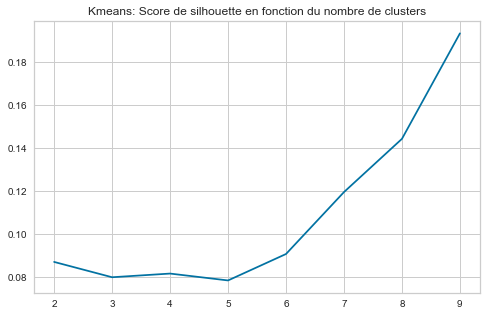

In [48]:
KmeansSilhouetteScore(X_scaled)

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


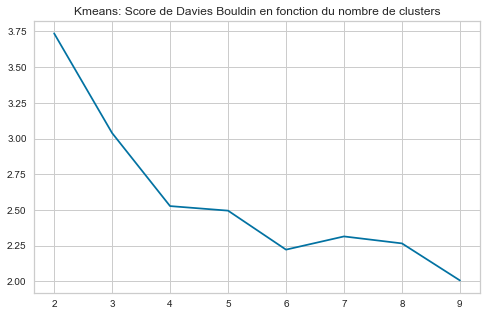

In [49]:
KmeansDaviesBouldinScore(X_scaled)

In [50]:
#HC silhouette score
def HCSilhouetteScore(dataframe):
    range_n_clusters = list (range(2,10))

    scores = []

    for n_clusters in range_n_clusters:
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        preds = clusterer.fit_predict(dataframe)
        #centers = clusterer.cluster_centers_

        score = silhouette_score(dataframe, preds)
        #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
        scores.append(score)

    plt.figure(figsize=(8,5))
    plt.title('HC: Score de silhouette en fonction du nombre de clusters')
    sns.lineplot(range(2,10),
                 scores)

In [51]:
#Davies Bouldin score
def HCDaviesBouldinScore(dataframe):
    results = {}
    for n_clusters in range(2,10):
        agg = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        preds = agg.fit_predict(dataframe)
        db_index = davies_bouldin_score(dataframe, preds)
        results.update({n_clusters: db_index})
    plt.figure(figsize=(8,5))
    plt.title('HC: Score de Davies Bouldin en fonction du nombre de clusters')
    sns.lineplot(range(2,10),list(results.values()))

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


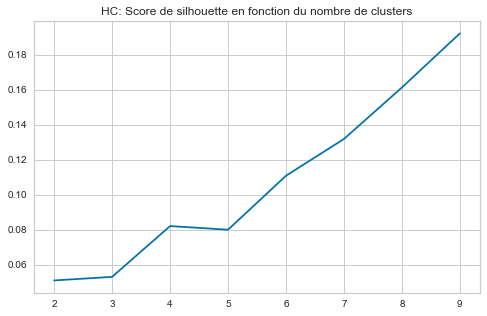

In [52]:
HCSilhouetteScore(X_scaled)

D:\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


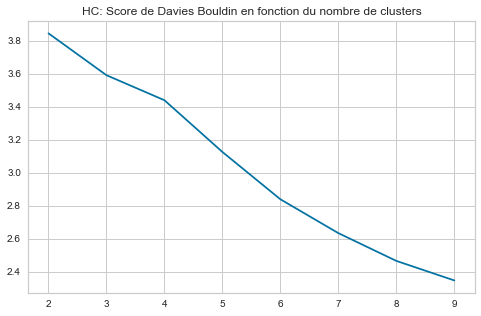

In [53]:
HCDaviesBouldinScore(X_scaled)

In [245]:
#X=data.copy()
data_reduce = data.sample(10000, random_state=1).copy()
X = data_reduce.copy()
categorical_columns = X.select_dtypes(['object']).columns
print(categorical_columns)
numerical_columns = X.select_dtypes(['float64']).columns

print('Features shape: ', X.shape)
ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numericadata_cleaned_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit(X[categorical_columns])
print('Features shape: ', X.shape)

NameError: name 'data' is not defined

In [ ]:
print('Features shape: ', X.shape)
X = pd.get_dummies(X)
print('Features shape: ', X.shape)

In [ ]:
X.head()

In [ ]:
X = data.copy()

In [ ]:
# extracting values from two 
# columns for clustering
dataset_new = X.values

In [ ]:
# determining the maximum number of clusters 
# using the simple method

limit = int((dataset_new.shape[0]//2)**0.5)
limit = 10
print(limit)

In [ ]:
# determing number of clusters
# using silhouette score method

for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    pred = model.predict(dataset_new)
    score = silhouette_score(dataset_new, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

In [ ]:
# clustering the data using Kmeans
# using k = 2

model = KMeans(n_clusters=4)
  
# predicting the clusters
pred = model.fit_predict(dataset_new)
  
# plotting all the clusters
#
colours = ['red', 'blue', 'green', 'yellow', 'orange']
  
for i in np.unique(model.labels_):
    plt.scatter(dataset_new[pred==i, 0],
                dataset_new[pred==i, 1],
                c = colours[i])
      
# plotting the cluster centroids
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1], 
            s = 200,  # marker size
            c = 'black')
  
plt.title('K Means clustering')
plt.xlabel('Depense_tot')
plt.ylabel('Nb_achat')
plt.show()

In [ ]:
#data = data.sample(10000, random_state=1).copy()

In [ ]:
X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])).set_index(X.index),
        left_index = True, right_index = True)

In [ ]:
X.head()

In [ ]:
kmeans = KMeans(n_clusters=5, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X)

In [ ]:
kmeans.labels_

In [ ]:
inertia = {}
dict_kmeans = {}

nb_boucles=3
max_clusters = 25

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters=i,
                       verbose=1,
                       n_jobs=-1).fit(X)
        inertia[(k,i)] = kmeans.inertia_
        dict_kmeans[k,i] = kmeans

In [ ]:
'''print('Training Features shape: ', data.shape)


# one-hot encoding of categorical variables
data = pd.get_dummies(data)

print('Training Features shape: ', data.shape)'''

In [ ]:
Y = X['Nb_achat'].values

In [ ]:
print(Y.shape)
print(X.shape)

In [ ]:
X_norm = preprocessing.scale(X)
print(X_norm)

In [ ]:
'''data = data.drop(['customer_id'], axis=1)
'''

In [ ]:
'''data.head()'''

In [ ]:
'''data.select_dtypes(['object']).nunique()'''

In [ ]:
#data_object = data.select_dtypes(['object']).values

In [ ]:
'''data = data.drop(['customer_city', 'customer_state', 'Cat_pref', 'order_purchase_timestamp', 'date_dernier_achat'], 
          axis=1)'''

In [ ]:
'''data.head()'''

In [ ]:
data.set_index('customer_unique_id', inplace=True)

In [ ]:
data.select_dtypes(['object']).nunique()

In [ ]:
'''data['order_purchase_timestamp'] = data['order_purchase_timestamp'].astype(
    'datetime64')
data['date_dernier_achat'] = data['date_dernier_achat'].astype(
    'datetime64')'''

In [ ]:
data.dtypes

In [ ]:
'''X = data'''

In [ ]:
'''categorical_columns = X.select_dtypes(['object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit(X[categorical_columns])'''

In [ ]:
'''kmeans = KMeans(n_clusters=5, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X)'''

In [ ]:
'''
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
'''